[참고문헌] shiny0510, 임커밋
#1.   Attention

##1)   어텐션의 기본 아이디어

디코더에서 출력단어를 예측하는 매 시점마다, 인코더에서 전체 입력 문장을 다시 한 번 참고함. 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야 할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보는 것이 핵심.

*   입력 문장의 출력 전체를 디코더의 입력으로 활용
*   모두 동일한 비율이 아니라, 해당 시점에서 예측해야 할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보기

-> 출력시 인코더 값을 전체 참조, 참조하는 정도인 attention value에 따라 참조

##2) 텐서의 기본 특성

*   Weight를 곱해도 정보는 보존됨(특성이 보존됨)
*   Weight Sum: 전체 가중치는 1, Weight가 큰 쪽의 정보를 더 많이 가짐
*   두 벡터가 비슷하면 내적 값이 크고, 두 벡터가 다르면 내적 값이 작음

다음과 같이 모르는 명칭의 벡터들이 있다고 하자

Query(한 개의 벡터), Keys(여러 개의 벡터)

Query * Wq = Query

Keys * Wk = Keys

Keys * Wv = Values

Wq, Wk, Wv는 가중치(참고로 해당 값들 제외하고 가중치가 따로 없음)

Query * Key 내적연산 = 내적결과 (Query랑 Key가 비슷하면 내적 값이 큼->3번째 특징)

Weighted Sum: 내적결과 * Value 연산

Weight는 합이 1이고 양수여야 함 -> exponential 한 다음 합이 1이 되도록 총합으로 나눔

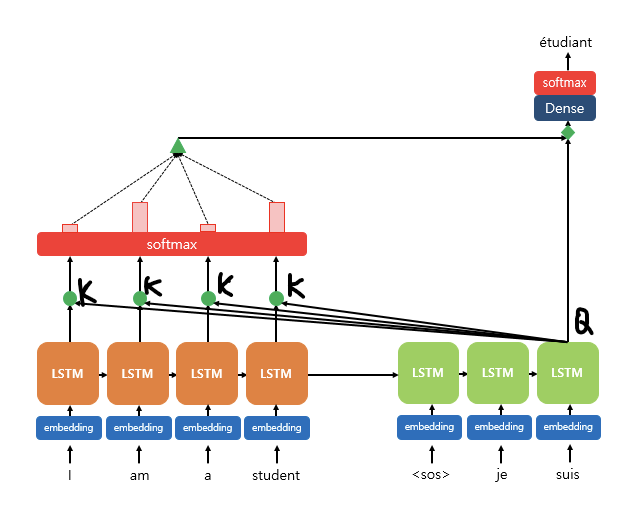

https://wikidocs.net/22893

디코더의 값이 인코더값중 가장 상관있는 값을 살려서 최종 가중치합 값을 계산

참조를 많이 하는 값과 퓨젼하여 아웃풋 생성

인코더가 무지막지하게 길어도 중요한 정보만 살릴 수 있음

https://wikidocs.net/160003

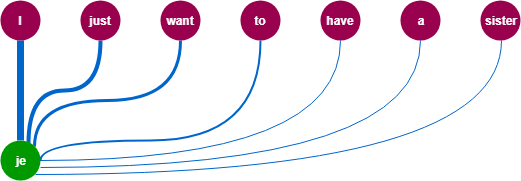

#2.   트랜스포머

1. 구조적 차이:

   seq2seq attention:
   - 인코더-디코더 구조를 기반으로 함
   - RNN(주로 LSTM 또는 GRU)을 사용하여 순차적으로 처리
   - 어텐션 메커니즘이 디코더에만 적용됨

   Transformer:
   - 인코더-디코더 구조를 유지하지만 RNN을 사용하지 않음
   - self-attention 메커니즘을 기반으로 함
   - 인코더와 디코더 모두에 어텐션 메커니즘이 적용됨

2. 병렬 처리:

   seq2seq attention:
   - RNN의 특성상 순차적 처리가 필요하여 병렬화가 제한적임

   Transformer:
   - self-attention 메커니즘으로 인해 높은 수준의 병렬 처리가 가능
   - 이로 인해 더 빠른 학습과 추론이 가능

3. 장기 의존성 처리:

   seq2seq attention:
   - RNN의 한계로 인해 장기 의존성 처리에 어려움이 있음
   - 어텐션 메커니즘이 이를 일부 해결하지만 여전히 제한적

   Transformer:
   - self-attention 메커니즘을 통해 시퀀스 내의 모든 위치 간 직접적인 연결을 만들어 장기 의존성 문제를 효과적으로 해결

4. 위치 정보 처리:

   seq2seq attention:
   - RNN의 순차적 처리로 인해 자연스럽게 위치 정보가 처리됨

   Transformer:
   - RNN을 사용하지 않기 때문에 별도의 위치 인코딩(positional encoding)을 추가하여 위치 정보를 제공

5. 계산 복잡도:

   seq2seq attention:
   - 시퀀스 길이에 따라 계산 복잡도가 선형적으로 증가

   Transformer:
   - 자기 주의 메커니즘으로 인해 시퀀스 길이의 제곱에 비례하여 계산 복잡도가 증가하지만, 병렬 처리로 인해 실제 처리 시간은 더 짧을 수 있음

6. 모델 크기와 성능:

   seq2seq attention:
   - 일반적으로 Transformer보다 작은 모델 크기
   - 특정 작업에서는 여전히 효과적일 수 있음

   Transformer:
   - 더 큰 모델 크기로 인해 더 높은 성능을 달성할 수 있음
   - 대규모 언어 모델(예: BERT, GPT)의 기반이 됨

포지션, 셀프어텐션, 마스킹 개념 필요

이전 어텐션 개념에는 순서/맥락정보를 계산하는 부분이 없었음 -> Positional Encoding

벡터를 추가하여 위치정보 저장

주변 문장과의 문맥파악 -> self attention

영어번역 파트 교안 참고